# Final Experiment for Diploma thesis Bitcoin price prediction


#### Load all own need ipynb

In [1]:
%run Imports.ipynb
%run DataFrameBuilder.ipynb
%run ModelBuilder.ipynb
%run ModelEvaluator.ipynb

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def RefreshImports():
    %run Imports.ipynb
    %run DataFrameBuilder.ipynb
    %run ModelBuilder.ipynb
    %run ModelEvaluator.ipynb

# Porovnanie základných a interpolovaných dát cien Nvidie


In [3]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

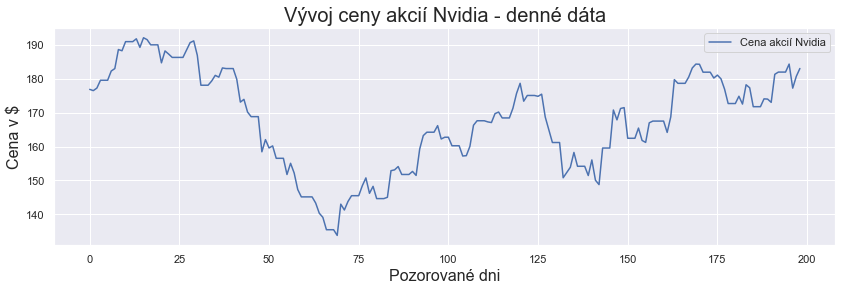

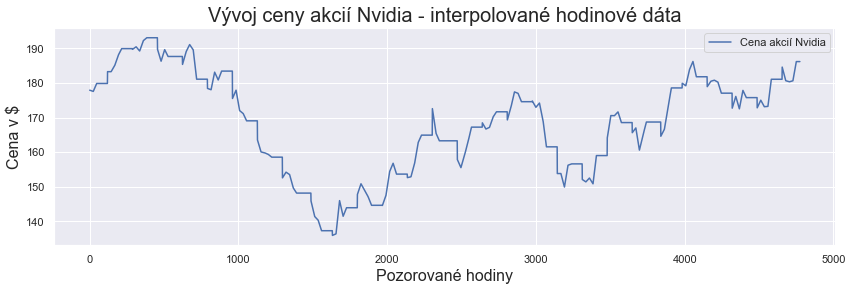

In [4]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny akcií Nvidia - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 16)
plt.ylabel("Cena v $", fontsize = 16)
plt.grid(True)
plt.plot(df.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right")
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny akcií Nvidia - interpolované hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 16)
plt.ylabel("Cena v $", fontsize = 16)
plt.grid(True)
plt.plot(dfl.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right")


# Porovnanie ceny BTC na dennej a hodinovej granularite

In [5]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

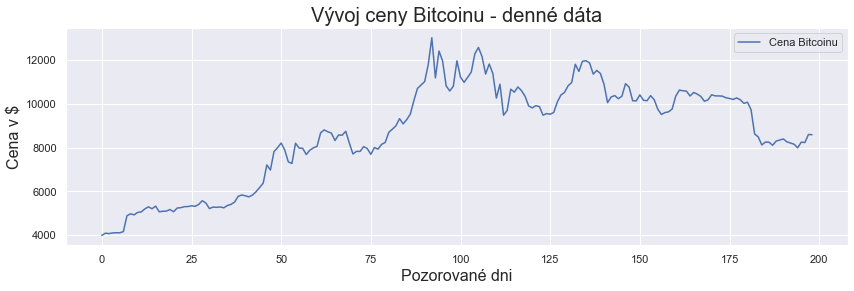

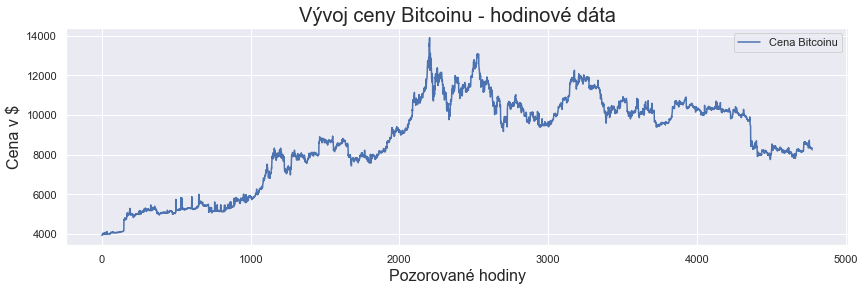

In [6]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny Bitcoinu - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 16)
plt.ylabel("Cena v $", fontsize = 16)
plt.grid(True)
plt.plot(df.close_price, label='Cena Bitcoinu')
plt.legend(loc="upper right")
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny Bitcoinu - hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 16)
plt.ylabel("Cena v $", fontsize = 16)
plt.grid(True)
plt.plot(dfl.price_close, label='Cena Bitcoinu')
plt.legend(loc="upper right")

# Porovnanie početností tried BTC na dennej a hodinovej granularite

In [7]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')


In [8]:
df['target'] = df.close_price.diff()
df['target'] =  np.where(df['target']>0, 'Rise', 'Fall')
dfl['target'] = dfl.price_close.diff()
dfl['target'] =  np.where(dfl['target']>0, 'Rise', 'Fall')

C:\Users\kriza\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


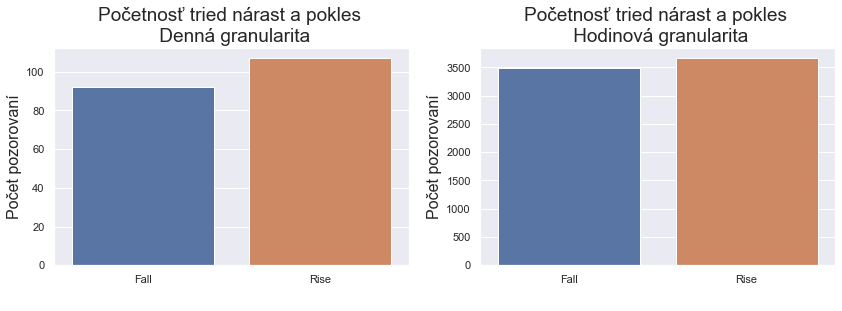

In [9]:

fig, ax =plt.subplots(1,2,figsize = (14,4))
ax[0].set_title(f'Početnosť tried nárast a pokles \n Denná granularita', fontsize = 19)

plt.grid(True)
sns.countplot(df.target, ax=ax[0] )
ax[0].set_xlabel(" ", fontsize = 16)
ax[0].set_ylabel("Počet pozorovaní", fontsize = 16)

ax[1].set_title(f'Početnosť tried nárast a pokles \n Hodinová granularita', fontsize = 19)
plt.grid(True)
sns.countplot(dfl.target, ax=ax[1])
ax[1].set_xlabel(" ", fontsize = 16)
ax[1].set_ylabel("Počet pozorovaní", fontsize = 16)

fig.show()


# Vytvorenie .csv pre výsledky gridsearchu

In [10]:
df = Create2ClassResultDataframe()
SaveTwoClassResult(df)

In [11]:
no_sample = 5

# Binary Classification - RF

 - Gridsearch pre binárnu klasifikáciu RF
 - 10 behov s random splitom pre vyššiu relevantnosť výsledkov 
 - možná aj cross validácia

In [12]:
resultDf = OpenTwoClassResult()

In [13]:
window_size = [ 0,1,5,10,15]
max_depth = [ x for x in range(5,15) ]
min_samples_split = [ x for x in range(2,6) ]
min_samples_leaf = [ x for x in range(1,6) ]

In [14]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in tqdm(window_size):
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                y_testm = []
                y_predm = []
                count = count - 1 
                print(">>>>"+str(count) + "<<<<<<", end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForTwoClass()
                else:
                    df = LoadDifferencedDatasetForTwoClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                for s in range(0, no_sample):    
                    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                    y_testm.append(y_test)
                    y_predm.append(y_pred)
                
                model = 'Random Forest'
                param = f'window_size: {i}  max_depth: {j} min_samples_split: {k} min_samples_leaf: {l}'
                resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
                SaveTwoClassResult(resultDf)

>>>>0<<<<<<<<


# 3Class Classification - RF

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
max_depth = [ x for x in range(5,15) ]
min_samples_split = [ x for x in range(2,6) ]
min_samples_leaf = [ x for x in range(1,6) ]

In [ ]:
count = (len(window_size)*len(max_depth)*len(min_samples_leaf)*len(min_samples_split))
for i in window_size:
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                count = count - 1 
                print(">>>>"+str(count) + "<<<<<<", end='\r')
                if(i == 0):
                    df = LoadDifferencedDatasetForThreeClass()
                else:
                    df = LoadDifferencedDatasetForThreeClass()
                    df = CreateSlidingWindows(df, windowsize= i)
                    
                y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier = RandomForestClassifier(n_estimators=101, max_depth=j, min_samples_split=k, min_samples_leaf = l ), test_size=0.2)
                model = "Random Forest"
                param = f'window_size: {i} , max_depth: {j} ,min_samples_split: {k} ,min_samples_leaf: {l}'
                resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
                SaveThreeClassResult(resultDf)

# Binary Classification - GNB

In [15]:
no_sample = 5

In [16]:
resultDf = OpenTwoClassResult()

In [17]:
window_size = [ 0,1,2,3,5,8,13,21]

In [18]:

count = (len(window_size))
for i in tqdm(window_size):
    y_testm = []
    y_predm = []
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 )    
        y_testm.append(y_test)
        y_predm.append(y_pred)
    
    model = 'GaussianNB'
    param = f'window_size: {i}'
    resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
    SaveTwoClassResult(resultDf)

>>>>0<<<<<<


# 3Class Classification - GNB

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:
count = (len(window_size))
for i in window_size:
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForThreeClass()
    else:
        df = LoadDifferencedDatasetForThreeClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =  GaussianNB(), test_size=0.2 )    
    model = "GaussianNB"
    param = f'window_size: {i}'
    resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
    SaveThreeClassResult(resultDf)

# Binary Classification - SVC

In [19]:
no_sample = 5

In [20]:
resultDf = OpenTwoClassResult()

In [22]:
window_size = [ 0,1,2,3,5,8,13,21]

In [23]:
count = (len(window_size))
for i in tqdm(window_size):
    y_testm = []
    y_predm = []
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForTwoClass()
    else:
        df = LoadDifferencedDatasetForTwoClass()
        df = CreateSlidingWindows(df, windowsize= i)
    for s in range(0, no_sample):
        y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )   
        y_testm.append(y_test)
        y_predm.append(y_pred)
        
    model = 'SVC'
    param = f'window_size: {i} gama: scale'
    resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
    SaveTwoClassResult(resultDf)

>>>>0<<<<<<


# 3Class Classification - SVC

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]

In [ ]:
count = (len(window_size))
for i in window_size:
    count = count - 1 
    print(">>>>"+str(count) + "<<<<<<", end='\r')
    if(i == 0):
        df = LoadDifferencedDatasetForThreeClass()
    else:
        df = LoadDifferencedDatasetForThreeClass()
        df = CreateSlidingWindows(df, windowsize= i)
    
    y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =svm.SVC(gamma='scale') , test_size=0.2 )    
    model = "SVC"
    param = f'window_size: {i}, gama: scale'
    resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
    SaveThreeClassResult(resultDf)

# Binary Classification - KNN

In [24]:
no_sample = 5

In [25]:
resultDf = OpenTwoClassResult()

In [26]:
window_size = [ 0,1,2,3,5,8,13]
n_neighbors = [ x for x in range(5,15) ]

In [27]:
count = (len(window_size)* len(n_neighbors))
for i in tqdm(window_size):
    for j in n_neighbors:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForTwoClass()
        else:
            df = LoadDifferencedDatasetForTwoClass()
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = 'KNN'
        param = f'window_size: {i} n_neighbors: {j}'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

>>>>0<<<<<<<


# 3Class Classification - KNN

In [ ]:
no_sample = 10

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
n_neighbors = [ x for x in range(5,15) ]

In [ ]:
count = (len(window_size)* len(n_neighbors))
for i in window_size:
    for j in n_neighbors:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetForThreeClass()
        else:
            df = LoadDifferencedDatasetForThreeClass()
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = Predict(df,scaler = StandardScaler(), classifier =KNeighborsClassifier(n_neighbors = j) , test_size=0.2 )    
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = "KNN"
        param = f'window_size: {i}, n_neighbors: {j}'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# Binary -  Linear regression - Classic approach

In [28]:
no_sample = 4

In [29]:
RefreshImports()

In [30]:
resultDf = OpenTwoClassResult()

In [31]:
window_size = [ 0,1,2,3,5,8,13]
normalize = [True, False]

In [32]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)
            
        for s in range(0, no_sample):
            y_test , y_pred = RegressionClassicPredictTwoClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)

        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j}'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

>>>>0<<<<<<<


# Linear regression - Classic approach

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_true , y_pred = Regression(df, train_ratio=0.80)
        
        evs  = explained_variance_score(y_true, y_pred)
        me = max_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        #msle = mean_squared_log_error(y_true, y_pred)
        meae = median_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        #mpd = mean_poisson_deviance(y_true, y_pred)
        #mgd = mean_gamma_deviance(y_true, y_pred)
        #mtd = mean_tweedie_deviance(y_true, y_pred, power=1)
        
        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j}'
        resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
        SaveRegressionResultDataframe(resultDf)

# 3Class -  Linear regression - Classic approach


In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_test , y_pred = RegressionClassicPredictThreeClass(df, train_ratio=0.80)

        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j}'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# Linear regression - Rolling approach

In [ ]:
RefreshImports()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_true , y_pred = RegressionRolling(df, train_ratio=0.80)

        evs  = explained_variance_score(y_true, y_pred)
        me = max_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        #msle = mean_squared_log_error(y_true, y_pred)
        meae = median_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        #mpd = mean_poisson_deviance(y_true, y_pred)
        #mgd = mean_gamma_deviance(y_true, y_pred)
        #mtd = mean_tweedie_deviance(y_true, y_pred, power=1)
        
        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j} rolling approach'
        resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
        SaveRegressionResultDataframe(resultDf)

# Binary Linear regression - Rolling approach

In [33]:
RefreshImports()

In [34]:
no_sample = 5

In [35]:
window_size = [ 0,1,2,3,5,8,13]
normalize = [True, False]

In [36]:
resultDf = OpenTwoClassResult()

In [37]:
count = (len(normalize)* len(window_size))
for i in tqdm(window_size):
    for j in normalize:
        y_testm = []
        y_predm = []
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        for s in range(0, no_sample):
            y_test , y_pred = RegressionRollingPredictTwoClass(df, train_ratio=0.80)
            y_testm.append(y_test)
            y_predm.append(y_pred)
        
        model = 'Linear Regression'
        param = f'window_size: {i} normalize: {j} rolling approach'
        resultDf = CreateMultipleResultAndAppend(resultDf, model, param, y_testm, y_predm)
        SaveTwoClassResult(resultDf)

>>>>0<<<<<<<


# 3Class Linear regression - Rolling approach

In [ ]:
RefreshImports()

In [ ]:
window_size = [ 0,1,2,3,5,8,13,21]
normalize = [True, False]

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
count = (len(normalize)* len(window_size))
for i in window_size:
    for j in normalize:
        count = count - 1 
        print(">>>>"+str(count) + "<<<<<<", end='\r')
        if(i == 0):
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
        else:
            df = LoadDifferencedDatasetWithTarget(target = 'percentage')
            df = CreateSlidingWindows(df, windowsize= i)

        y_test , y_pred = RegressionRollingPredictThreeClass(df, train_ratio=0.80)

        model = "Linear Regression"
        param = f'window_size: {i}, normalize: {j} rolling approach'
        resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
        SaveThreeClassResult(resultDf)

# ARIMA Model - 2Class
### Think about your life before u runt it

In [38]:
RefreshImports()

In [39]:
resultDf = OpenTwoClassResult()

In [40]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

Arima 26 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 439 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 496 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 623 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 792 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 823 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 956 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 1108 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


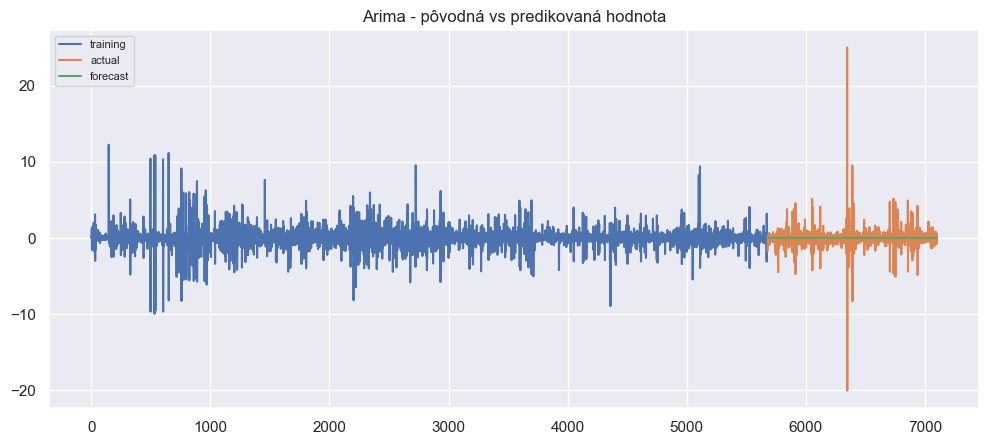

C:\Users\kriza\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


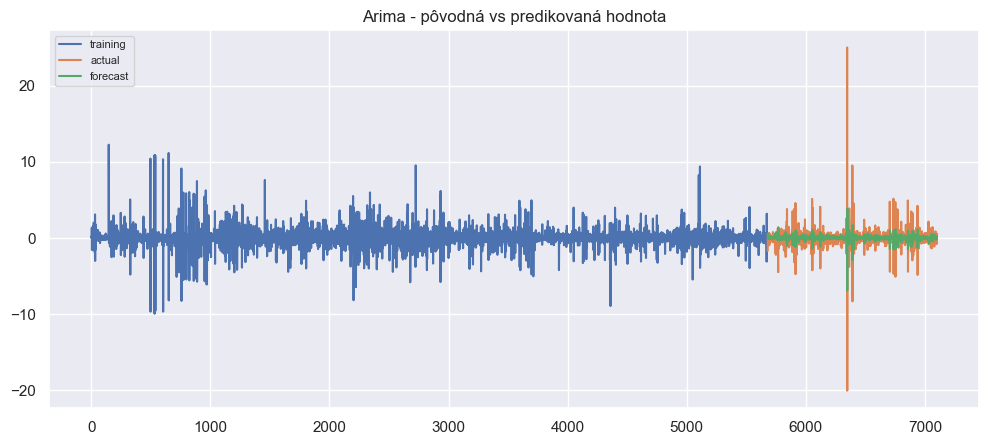

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


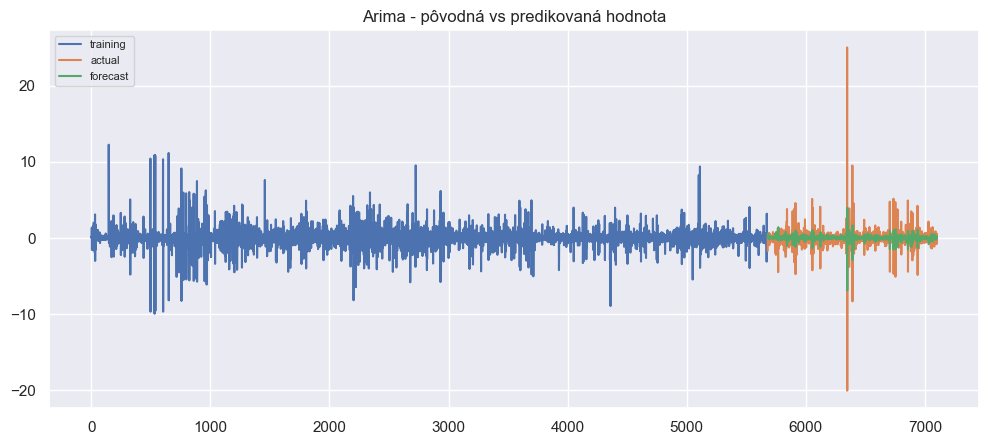

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 236 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 483 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 694 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 1049 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 1181 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 1212 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 1390 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


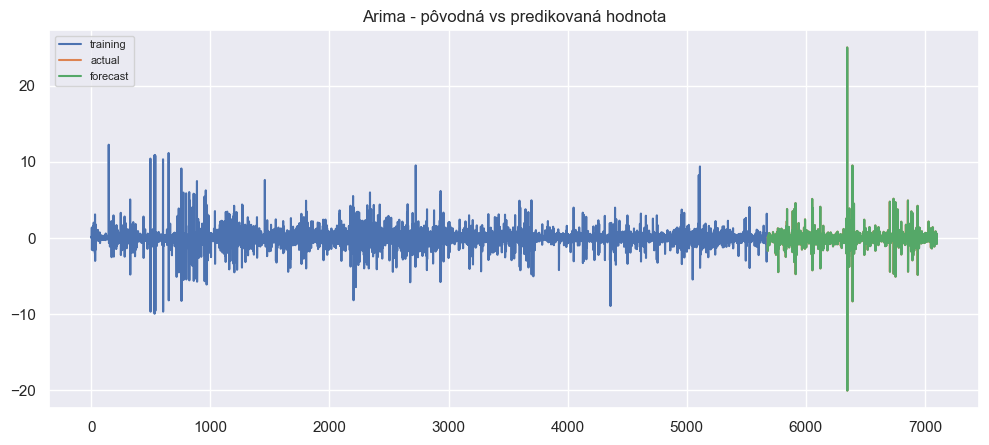

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


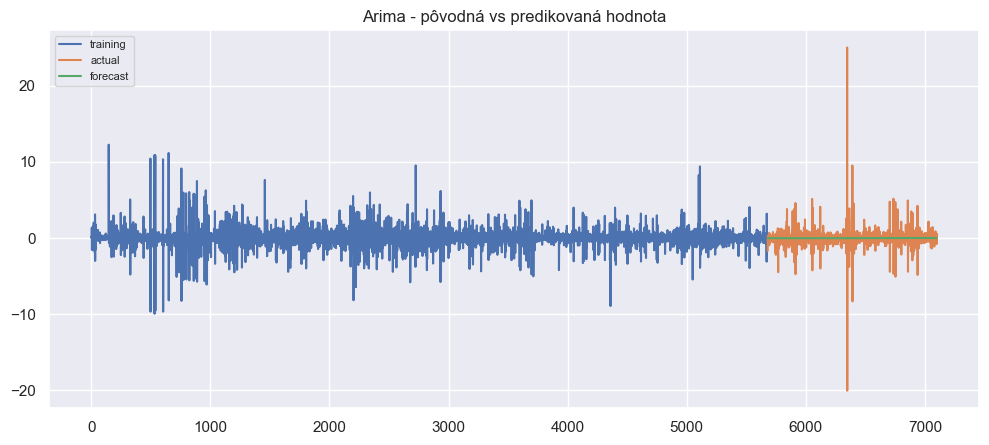

fail at 0 1 21
Arima 304 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 521 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 790 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 890 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Arima 1227 / 1421

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


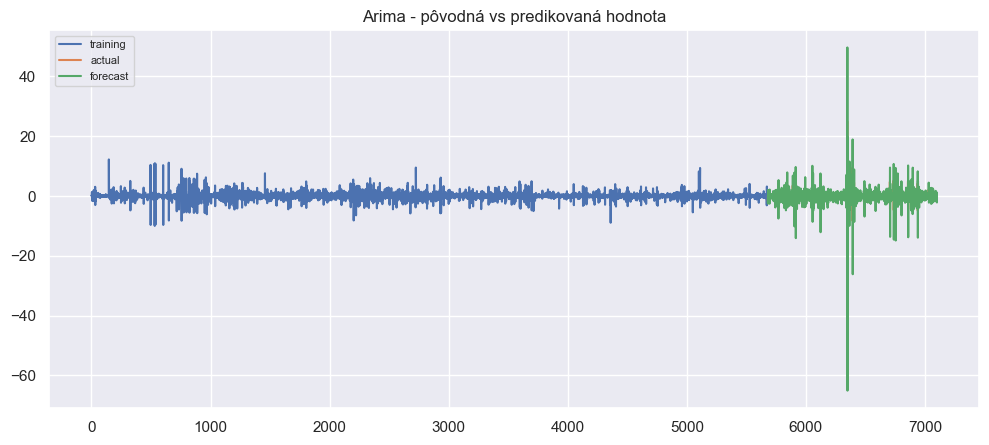

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


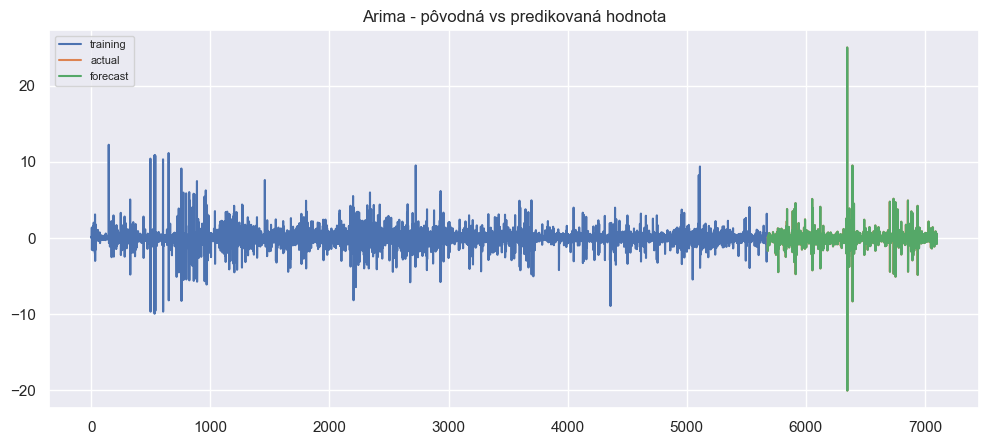

fail at 0 2 21


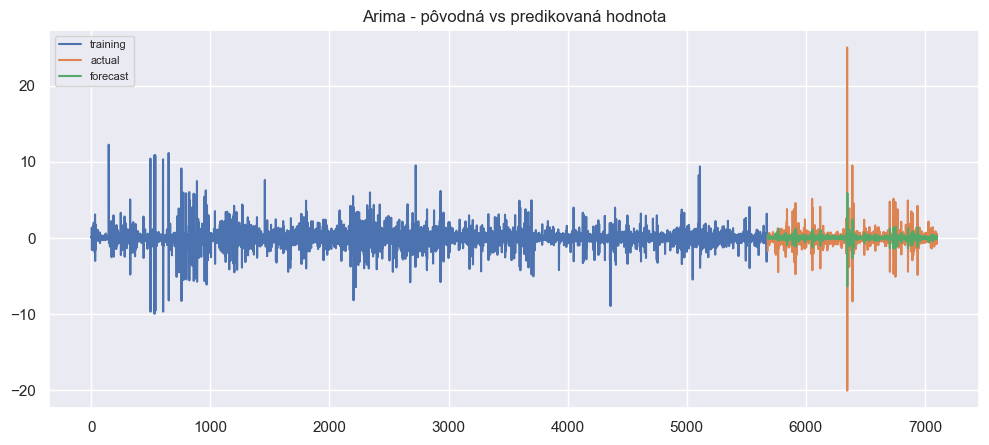

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


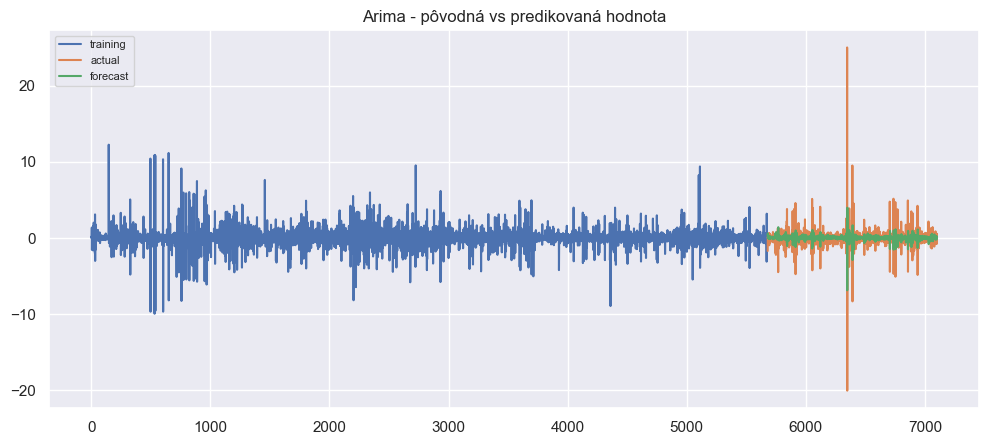

fail at 1 0 21


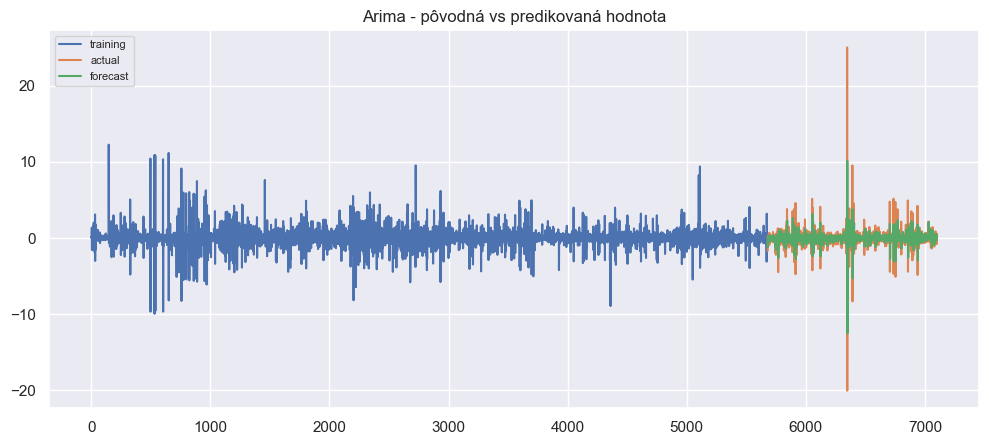

fail at 1 1 11
fail at 1 1 21


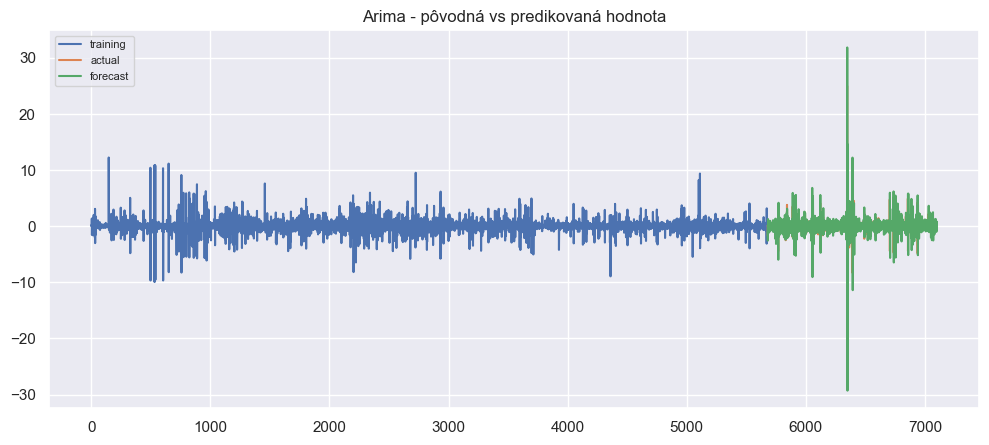

fail at 1 2 11
fail at 1 2 21


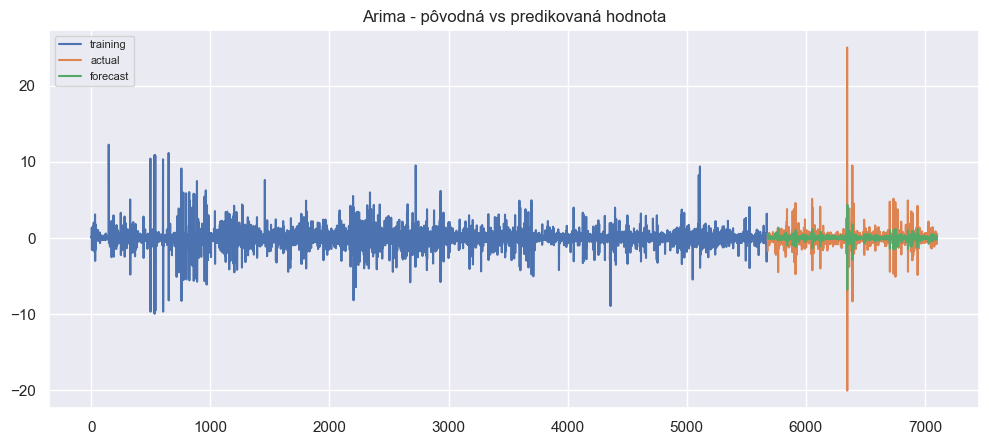

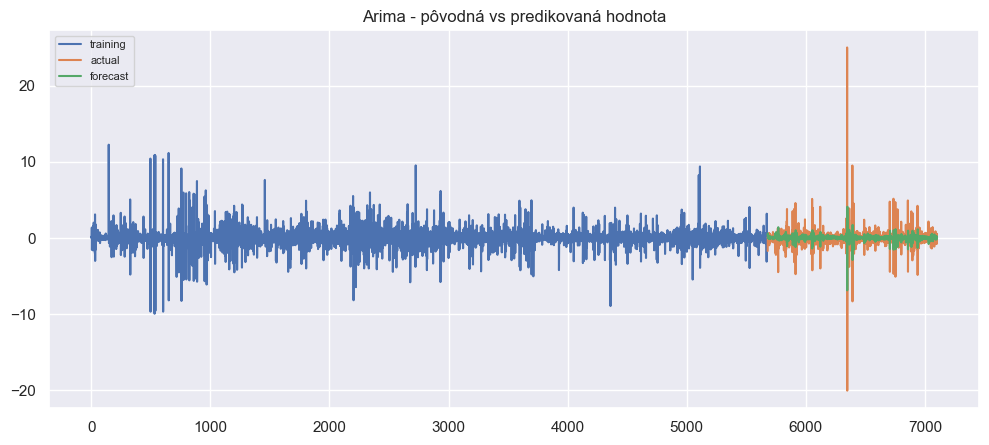

fail at 2 0 21


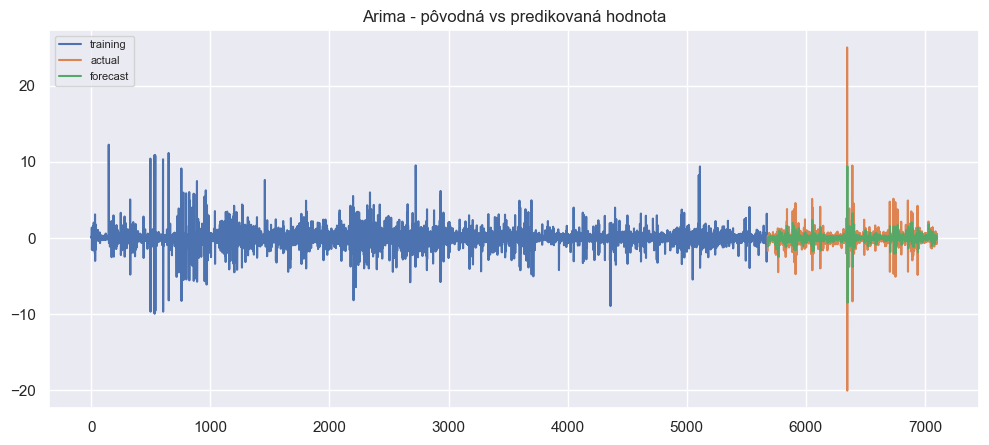

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


fail at 2 1 11421
fail at 2 1 21


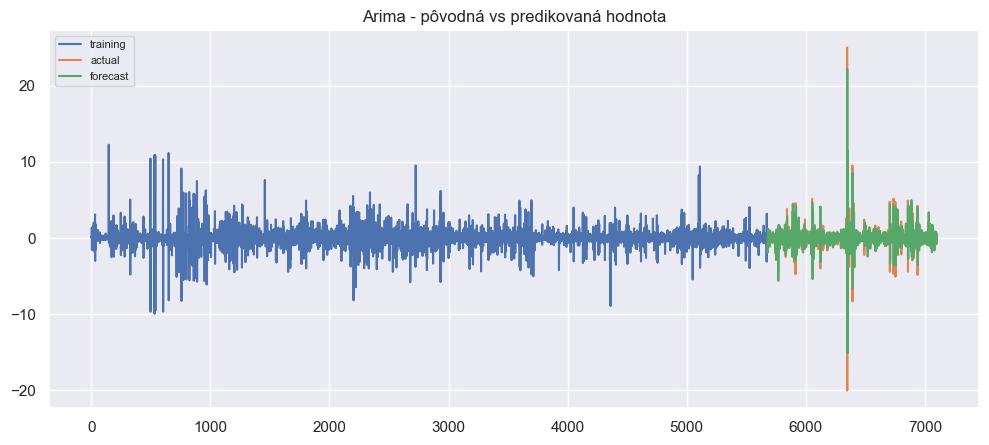

fail at 2 2 11
fail at 2 2 21


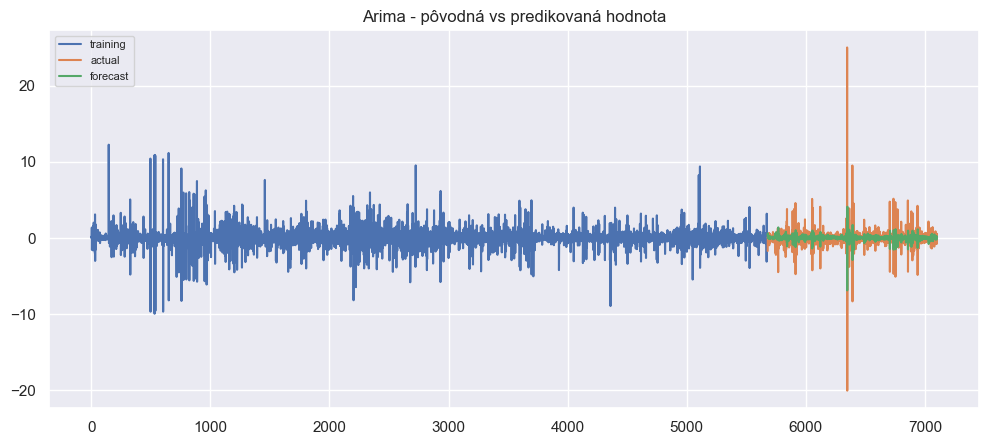

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_test , y_pred = DefArima(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue           
            model = 'ARIMA'
            param = f'p: {i} d: {j} q: {k}'
            resultDf = CreateResultAndAppend(resultDf, model, param, y_test, y_pred)
            SaveTwoClassResult(resultDf)

# ARIMA Model - 3Class
### Think about your life before u runt it

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_test , y_pred = DefArima3Class(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue  
            
            model = "ARIMA"
            param = f'p: {i}, d: {j}, q: {k}'
            resultDf = CreateResultAndAppendThreeClass(resultDf, model, param, y_test, y_pred)
            SaveThreeClassResult(resultDf)

# ARIMA Model -Regression
### Think about your life before u runt it

In [ ]:
RefreshImports()

In [ ]:
resultDf = OpenRegressionResultDataframe()

In [ ]:
p_values = [0, 1, 2, 4, 6] #[0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [ ]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            try:
                df = LoadDifferencedDatasetWithTarget(replace_old=True, target = 'percentage')
                y_true , y_pred = DefArimaRegression(df, splitRatio = 0.8, p = i, d = j, q = k)
            except:
                print(f'fail at {i} {j} {k}')
                continue  
            
            evs  = explained_variance_score(y_true, y_pred)
            me = max_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            meae = median_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            
            model = "ARIMA"
            param = f'p: {i}, d: {j}, q: {k}'
            resultDf = AppendToRegressionDataframe(resultDf, model, param, evs, me, mae, mse, meae, r2)
            SaveRegressionResultDataframe(resultDf)

# CHOOSE BEST MODELS - Binary

In [ ]:
resultDf = OpenTwoClassResult()

In [ ]:
resultDf.head(1005)

In [ ]:
resultDf[resultDf['Accuracy'] == resultDf.Accuracy.max()]

In [ ]:
resultDf[resultDf['PrecisionRise'] == resultDf.PrecisionRise.max()]

In [ ]:
resultDf[resultDf['PrecisionFall'] == resultDf.PrecisionFall.max()]

In [ ]:
resultDf[resultDf['RecallRise'] == resultDf.RecallRise.max()]

In [ ]:
resultDf[resultDf['RecalFall'] == resultDf.RecalFall.max()]

# CHOOSE BEST MODELS - 3Class

In [ ]:
resultDf = OpenThreeClassResult()

In [ ]:
resultDf[resultDf['Accuracy'] == resultDf.Accuracy.max()]

In [ ]:
resultDf[resultDf['PrecisionRise'] == resultDf.PrecisionRise.max()]

In [ ]:
resultDf[resultDf['PrecisionFall'] == resultDf.PrecisionFall.max()]

In [ ]:
resultDf[resultDf['RecallRise'] == resultDf.RecallRise.max()]

In [ ]:
resultDf[resultDf['RecalFall'] == resultDf.RecalFall.max()]